In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import heapq
import random


from sklearn import preprocessing
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv("movie_metadata.csv")

In [30]:
df.shape

(5043, 28)

In [64]:
print(df.isnull().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                         0
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [32]:
print('As usual, actors and directors are always get fans efficiency, which is a normal sutuation in movie industry. So, we do not put too much attention at these factors.')



As usual, actors and directors are always get fans efficiency, which is a normal sutuation in movie industry. So, we do not put too much attention at these factors.


In [33]:
#check mussing values
missing_ratio = df.isnull().sum()/len(df)
missing_value_df = pd.DataFrame({'missing_num': df.isnull().sum(),
                                 'percent_missing': missing_ratio})
missing_value_df

,missing_num,percent_missing
color,19,0.003768
director_name,104,0.020623
num_critic_for_reviews,50,0.009915
duration,15,0.002974
director_facebook_likes,104,0.020623
actor_3_facebook_likes,23,0.004561
actor_2_name,13,0.002578
actor_1_facebook_likes,7,0.001388
gross,884,0.175292
genres,0,0.000000


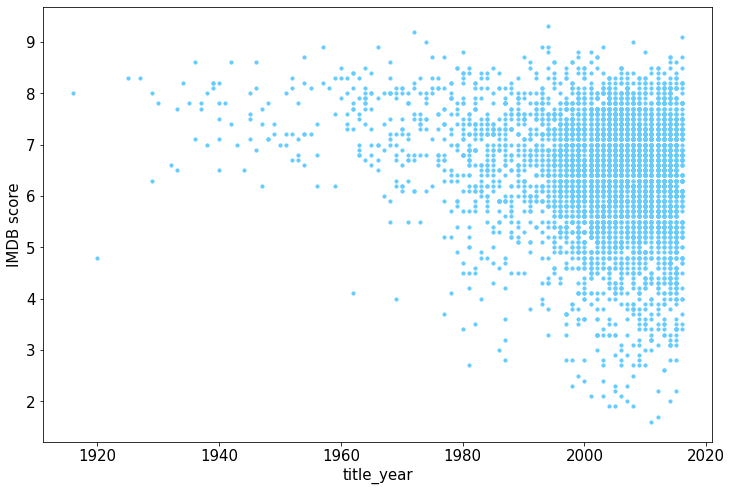

In [65]:
# check the trends in the movie industry

title_year = df['title_year']
score = df['imdb_score']
plt.figure(figsize=(12, 8))
plt.xlabel('title_year', fontsize=15)
plt.ylabel('IMDB score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(title_year, score, color = '#66ccff', s = 10)
plt.show()

In [66]:
print('This chart shows that the film industry is developing rapidly since 1990, and the distribution of quality assessment is gradually increasing. The overall score has little change, while the number of low-rated films has increased.')
print ('Audience acceptance affects, but does not fully reflect, the artistic level of a film. From there, we can focus on something else. It also leads to thinking whether the number of films will affect the severity of audience evaluation.')



This chart shows that the film industry is developing rapidly since 1990, and the distribution of quality assessment is gradually increasing. The overall score has little change, while the number of low-rated films has increased.
Audience acceptance affects, but does not fully reflect, the artistic level of a film. From there, we can focus on something else. It also leads to thinking whether the number of films will affect the severity of audience evaluation.


In [67]:
# Variables will not be used for modeling

drop_1 = ['color','director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link']
df_copy1 = df.drop(drop_1, axis=1)

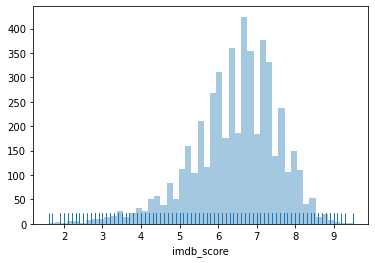

In [70]:
# check score range

x = df['imdb_score']
sns.distplot(x, kde=False, rug=True)

In [71]:
from collections import Counter

array = df['imdb_score']
print(array)
print(Counter(array).most_common(1)[0][0])

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
5038    7.7
5039    7.5
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 5043, dtype: float64
6.7


In [72]:
print('This bar chart shows the number of movie ratings, which is close to a regular normal distribution, with the highest number of movies rated 6.7.')
print('This graph shows an interesting phenomenon: the interval of fractions has a certain regularity. The reason behind this is that the audience is more inclined to choose certain rating numbers or the influence of the number of hand comments, which is worth studying.')

This bar chart shows the number of movie ratings, which is close to a regular normal distribution, with the highest number of movies rated 6.7.
This graph shows an interesting phenomenon: the interval of fractions has a certain regularity. The reason behind this is that the audience is more inclined to choose certain rating numbers or the influence of the number of hand comments, which is worth studying.


In [35]:
df_copy1.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [36]:
df_copy1.describe(include=['O'])

,genres,language,country,content_rating
count,5043,5031,5038,4740
unique,914,47,65,18
top,Drama,English,USA,R
freq,236,4704,3807,2118


In [37]:
df_copy1.shape

(5043, 20)

In [38]:
#check fault outliers

neg_list = ['budget', 'gross', 'title_year']
for item in neg_list:
        neg_item = df[item]<0
        print('There are ' + str(neg_item.sum()) + ' movie/movies with a ' + item + ' less than 0')
        

There are 0 movie/movies with a budget less than 0
There are 0 movie/movies with a gross less than 0
There are 0 movie/movies with a title_year less than 0


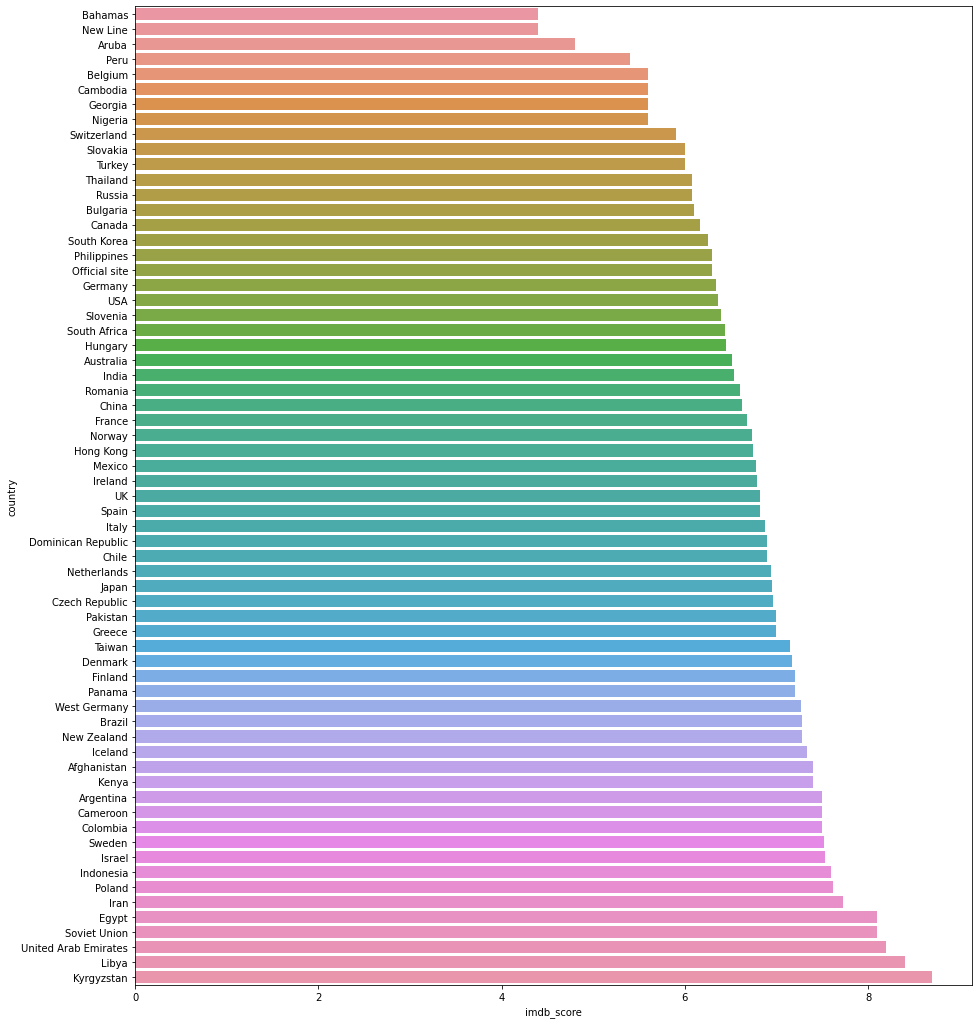

In [39]:
plot = df[["country", "imdb_score"]].groupby(['country'], as_index=False).mean().sort_values(by='imdb_score')

plt.figure(figsize = (15,18))
sns.barplot(y='country',x='imdb_score', data=plot, orient="h")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaf03193a0>],
      dtype=object)

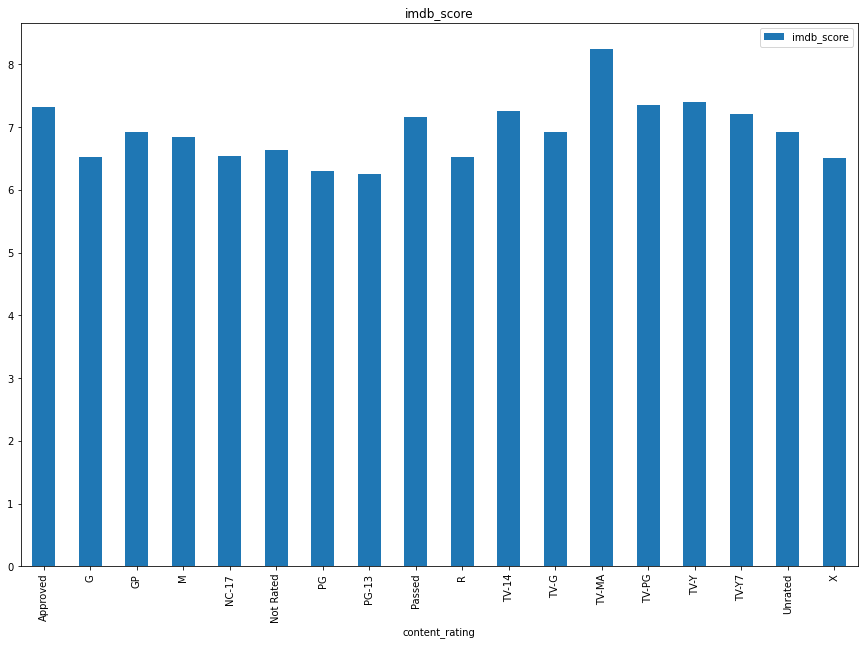

In [40]:
df_copy1[['imdb_score','content_rating']].groupby(['content_rating']).mean().plot.bar(subplots=True, figsize=(15, 10))

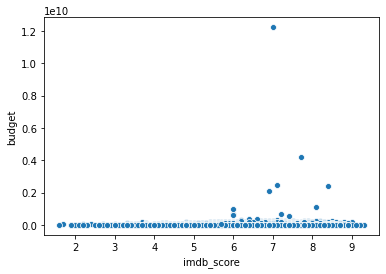

In [41]:
#check the effects between budget and scores

g=sns.scatterplot(data=df_copy1, x='imdb_score',y='budget')

In [42]:
#check budget

df['budget'].fillna(0, inplace=True)
budget_outliers = heapq.nlargest(13,df['budget'])
print('these are remarkable outliers in budget column: ' + str((budget_outliers)))

these are remarkable outliers in budget column: [12215500000.0, 4200000000.0, 2500000000.0, 2400000000.0, 2127519898.0, 1100000000.0, 1000000000.0, 700000000.0, 700000000.0, 600000000.0, 553632000.0, 400000000.0, 390000000.0]


In [43]:
#filter outliers
df_copy1 = df_copy1[df_copy1.budget<390000000]

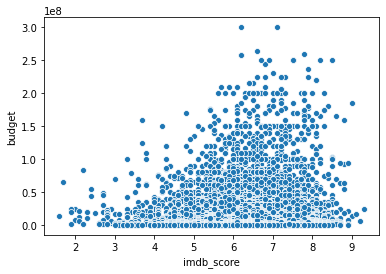

In [44]:
sns.scatterplot(data=df_copy1, x='imdb_score',y='budget')

In [45]:
df_copy1.shape

(4538, 20)

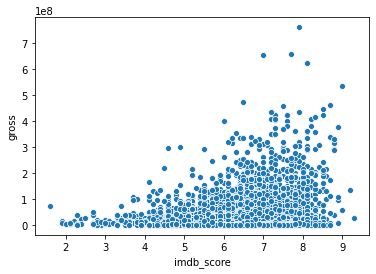

In [46]:
sns.scatterplot(data=df_copy1, x='imdb_score',y='gross')

In [47]:
#filter outliers
df_copy1 = df_copy1[df_copy1.gross<533316061]

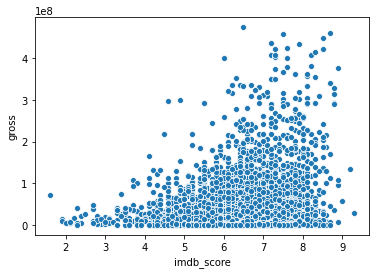

In [48]:
sns.scatterplot(data=df_copy1, x='imdb_score',y='gross')

In [49]:
df_copy1.shape

(3872, 20)

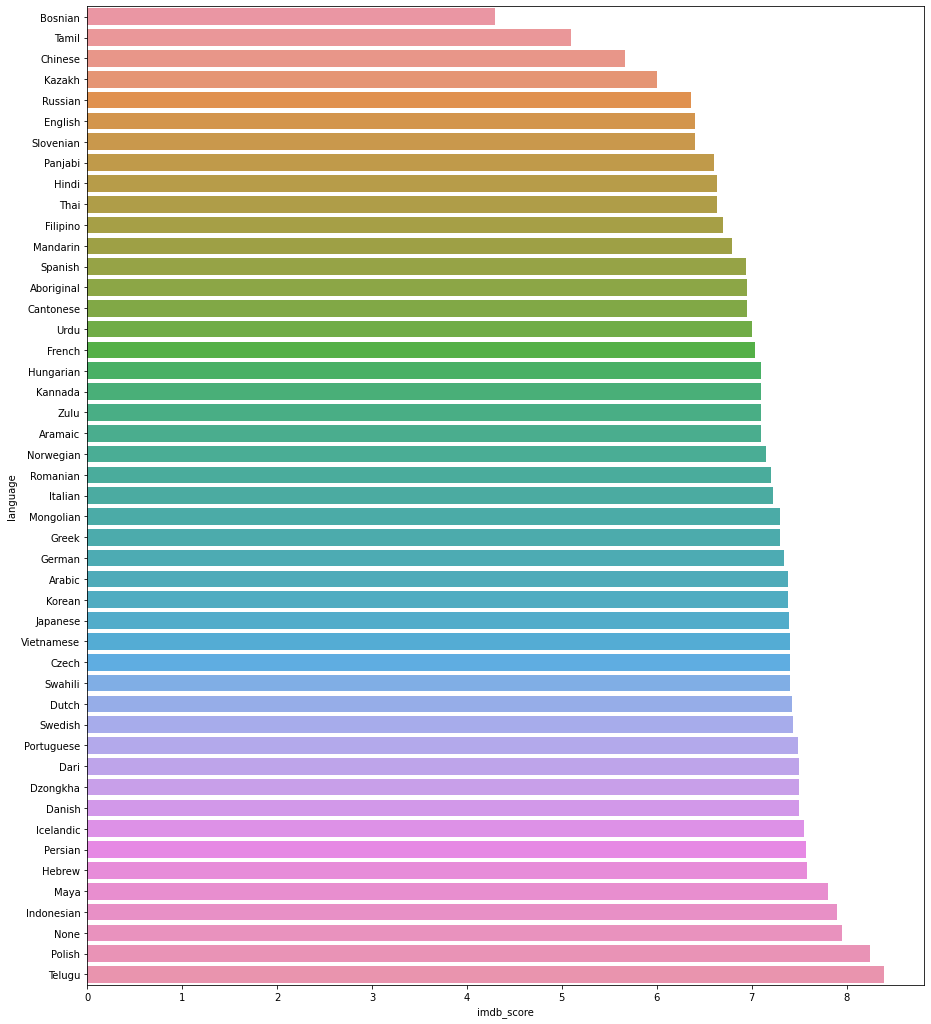

In [50]:
plot = df[["language", "imdb_score"]].groupby(['language'], as_index=False).mean().sort_values(by='imdb_score')

plt.figure(figsize = (15,18))
sns.barplot(y='language',x='imdb_score', data=plot, orient="h")

In [51]:
#decide to drop country
df_copy2 = df_copy1.drop('country',axis=1)

In [52]:
df_copy2.isnull().sum()

num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_1_facebook_likes        3
gross                         0
genres                        0
num_voted_users               0
cast_total_facebook_likes     0
facenumber_in_poster          6
num_user_for_reviews          0
language                      3
content_rating               50
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

In [53]:
#deal with missing value
cols = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','budget','aspect_ratio','num_user_for_reviews','actor_2_facebook_likes']
df_copy2[cols]=df_copy2[cols].fillna(df_copy2.dropna().mean().iloc[0])

In [54]:
df_copy2['content_rating'].fillna(df_copy2['content_rating'].dropna().mode()[0], inplace=True)
df_copy2['language'].fillna(df_copy2['language'].dropna().mode()[0], inplace=True)

In [55]:
df_copy2.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [56]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3872 entries, 1 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3872 non-null   float64
 1   duration                   3872 non-null   float64
 2   director_facebook_likes    3872 non-null   float64
 3   actor_3_facebook_likes     3872 non-null   float64
 4   actor_1_facebook_likes     3872 non-null   float64
 5   gross                      3872 non-null   float64
 6   genres                     3872 non-null   object 
 7   num_voted_users            3872 non-null   int64  
 8   cast_total_facebook_likes  3872 non-null   int64  
 9   facenumber_in_poster       3872 non-null   float64
 10  num_user_for_reviews       3872 non-null   float64
 11  language                   3872 non-null   object 
 12  content_rating             3872 non-null   object 
 13  budget                     3872 non-null   float

In [57]:
categorical_cols = ['language','title_year','content_rating']
data = pd.get_dummies(df_copy2, columns = categorical_cols)

In [58]:
data.shape

(3872, 140)

In [59]:
X = data.drop(['imdb_score','genres'],axis=1)
y = data['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0, n_estimators=200)
reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [60]:
reg.predict(X_test)
reg.score(X_test, y_test)

0.5325493291386749

In [61]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.4026480166776897

In [62]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

/Users/chloejia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.59512e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.4063534373131511

In [63]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_train,y_train)
regr.predict(X_test)
regr.score(X_test, y_test)


-0.03081798273614056